# **Importação de Bibliotecas**

In [ ]:
!pip install skillsnetwork

In [ ]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import skillsnetwork
import os
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [ ]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

In [ ]:
await skillsnetwork.prepare("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip", path = "./", overwrite=True)

  0%|          | 0/40000 [00:00<?, ?it/s]

Saved to '.'


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

# **Preparando arquivos**

In [ ]:
directory="./"
negative='Negative'
positive="Positive"

In [ ]:
negative_file_path=os.path.join(directory,negative)
negative_file_path

'./Negative'

In [ ]:
os.listdir(negative_file_path)[0:3]

['12329.jpg', '07134.jpg', '16656.jpg']

In [ ]:
[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path)][0:3]

['./Negative/12329.jpg', './Negative/07134.jpg', './Negative/16656.jpg']

In [ ]:
print("test.jpg".endswith(".jpg"))
print("test.mpg".endswith(".jpg"))

True
False


In [ ]:
negative_files=[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path) if file.endswith(".jpg")]
negative_files.sort()
negative_files[0:3]

['./Negative/00001.jpg', './Negative/00002.jpg', './Negative/00003.jpg']

In [ ]:
positive_file_path=os.path.join(directory,positive)
positive_files=[os.path.join(positive_file_path,file) for file in  os.listdir(positive_file_path) if file.endswith(".jpg")]
positive_files.sort()
positive_files[:3]

['./Positive/00001.jpg', './Positive/00002.jpg', './Positive/00003.jpg']

# **Visualização de dados**

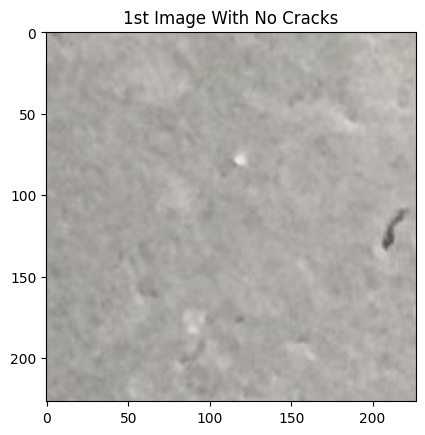

In [ ]:
image1 = Image.open(negative_files[0])
plt.imshow(image1)
plt.title("1st Image With No Cracks")
plt.show()

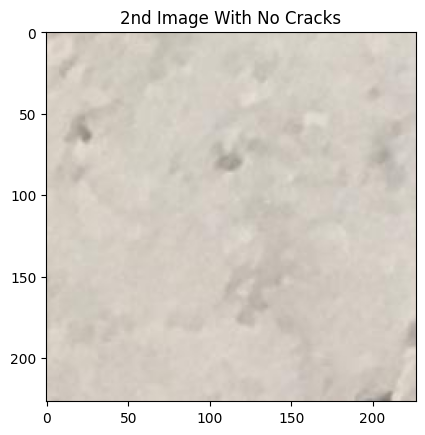

In [ ]:
image2 = Image.open(negative_files[1])
plt.imshow(image2)
plt.title("2nd Image With No Cracks")
plt.show()

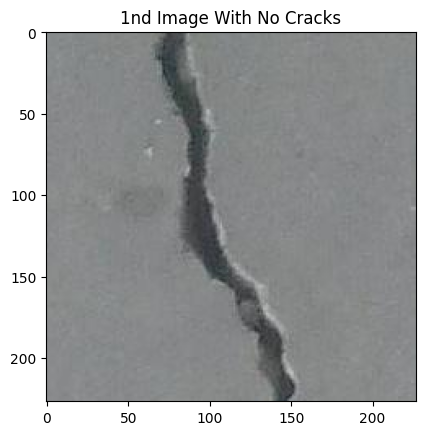

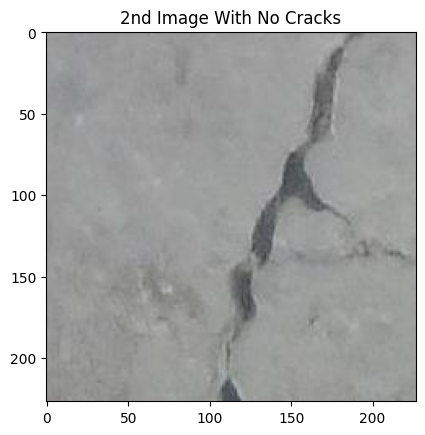

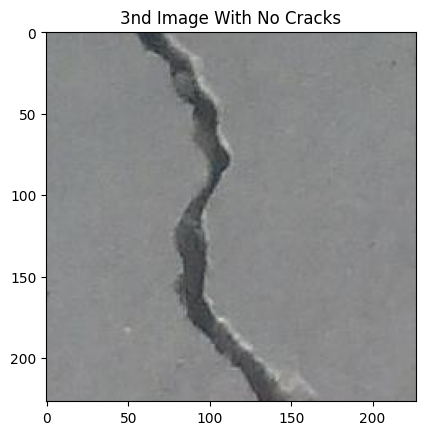

In [ ]:
for i in range(3):
  image = Image.open(positive_files[i])
  plt.imshow(image)
  plt.title(f"{i + 1}nd Image With No Cracks")
  plt.show()

In [ ]:
number_of_samples = len(negative_files + positive_files)
Y=torch.zeros([number_of_samples])
Y=Y.type(torch.LongTensor)
Y.type()

'torch.LongTensor'

In [ ]:
Y[::2]=1
Y[1::2]=0

Crie uma lista all_files de forma que os índices pares contenham o caminho para imagens com amostras positivas ou rachadas e o elemento ímpar contenha as imagens negativas ou imagens sem rachaduras. Em seguida, use o código a seguir para imprimir as primeiras quatro amostras

In [ ]:
all_files = []
for positive, negative in zip(positive_files, negative_files):
    all_files.append(positive)
    all_files.append(negative)

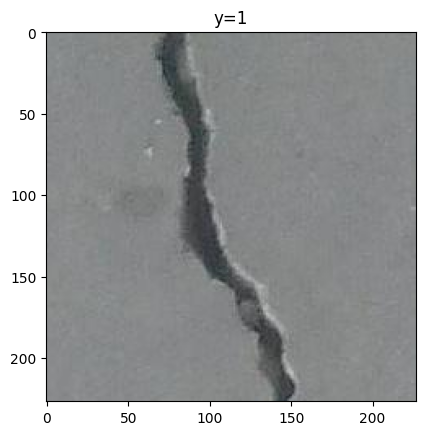

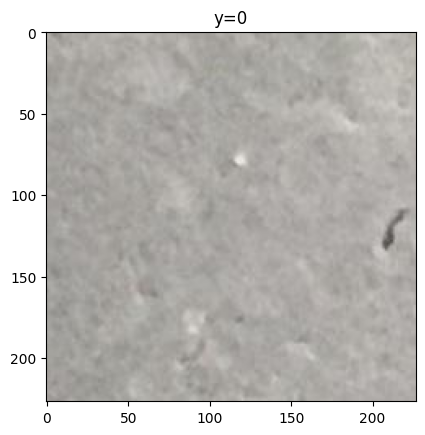

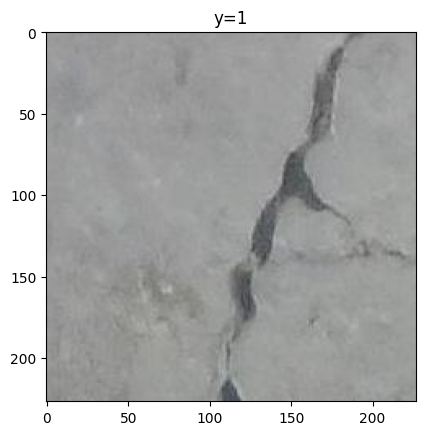

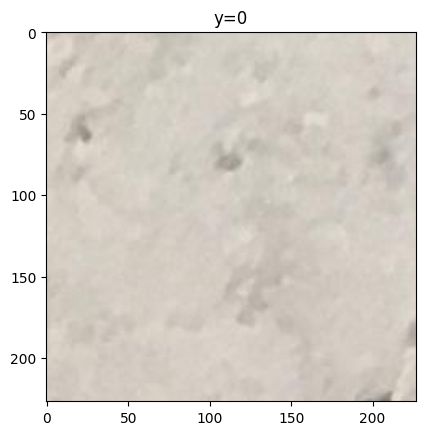

In [ ]:
for y,file in zip(Y, all_files[0:4]):
    plt.imshow(Image.open(file))
    plt.title("y="+str(y.item()))
    plt.show()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
train=False

if train:
    all_files=all_files[0:30000]
    Y=Y[0:30000]

else:
    all_files=all_files[30000:]
    Y=Y[30000:]

Complete o código para construir uma classe de conjunto de dados <code>dataset</code>. Como antes, certifique-se de que as amostras pares sejam positivas e as amostras ímpares sejam negativas. Se o parâmetro <code>train</code> estiver definido como <code>True</code>, use as primeiras 30.000 amostras como dados de treinamento; caso contrário, as amostras restantes serão utilizadas como dados de validação.

In [ ]:
class Dataset(Dataset):
    # Constructor
    def __init__(self, transform=None, train=True):
        directory = "./"
        positive = "Positive"
        negative = "Negative"

        positive_file_path = os.path.join(directory, positive)
        negative_file_path = os.path.join(directory, negative)

        positive_files = [os.path.join(positive_file_path, file) for file in os.listdir(positive_file_path) if file.endswith(".jpg")]
        negative_files = [os.path.join(negative_file_path, file) for file in os.listdir(negative_file_path) if file.endswith(".jpg")]

        positive_files.sort()
        negative_files.sort()

        number_of_samples = min(len(positive_files), len(negative_files)) * 2

        all_files = [None] * number_of_samples
        all_files[::2] = positive_files[:number_of_samples // 2]
        all_files[1::2] = negative_files[:number_of_samples // 2]

        self.transform = transform
        self.all_files = all_files

        # Create labels: 1 for positive, 0 for negative
        self.Y = torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2] = 1
        self.Y[1::2] = 0

        if train:
            self.all_files = self.all_files[:30000]
            self.Y = self.Y[:30000]
        else:
            self.all_files = self.all_files[30000:]
            self.Y = self.Y[30000:]

        self.len = len(self.all_files)

    # Get the length
    def __len__(self):
        return self.len

    # Getter
    def __getitem__(self, idx):
        image = Image.open(self.all_files[idx])
        y = self.Y[idx]

        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

<b>Crie um objeto Dataset <code>dataset</code> para os dados de treinamento, use as seguintes linhas de código para imprimir a amostra 10 e a amostra 100 (lembre-se da indexação zero) </b>

In [ ]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform =transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean, std)])

In [ ]:
dataset_train=Dataset(transform=transform,train=True)
dataset_val=Dataset(transform=transform,train=False)

In [ ]:
dataset_train[0][0].shape

torch.Size([3, 227, 227])

In [ ]:
size_of_image=3*227*227
size_of_image

154587

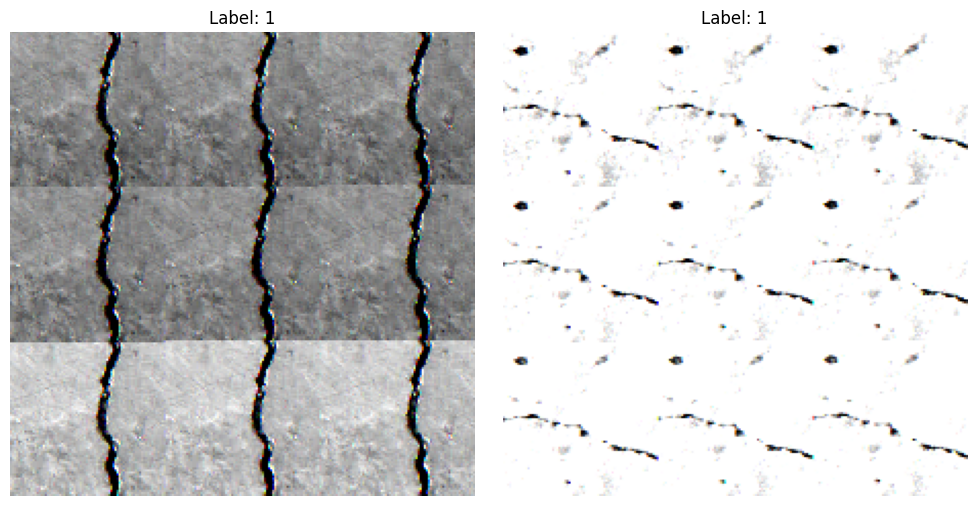

In [ ]:
samples = [dataset_train[10], dataset_train[100]]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, (img, label) in enumerate(samples):
    axes[i].imshow(img.reshape(227, 227, 3))
    axes[i].set_title(f'Label: {label.item()}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

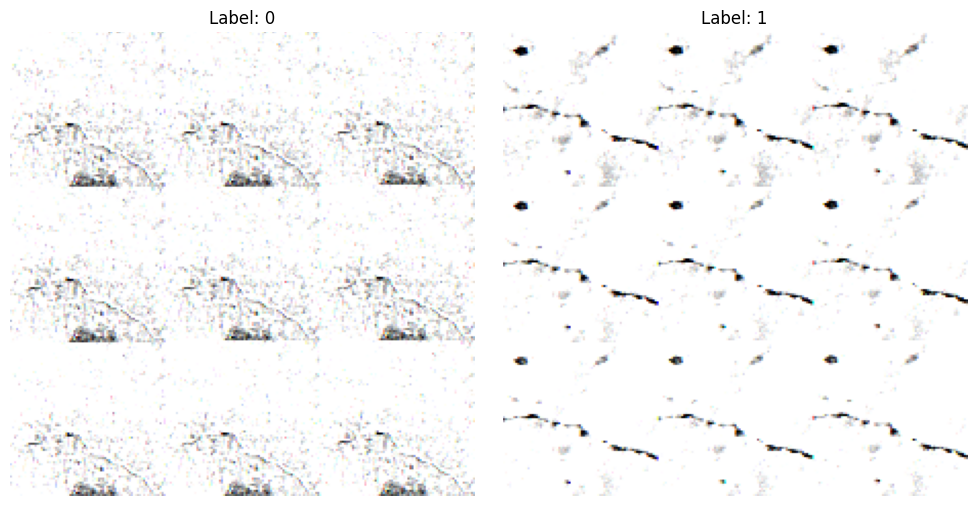

In [ ]:
samples = [dataset_train[9], dataset_train[100]]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, (img, label) in enumerate(samples):
    axes[i].imshow(img.reshape(227, 227, 3))
    axes[i].set_title(f'Label: {label.item()}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

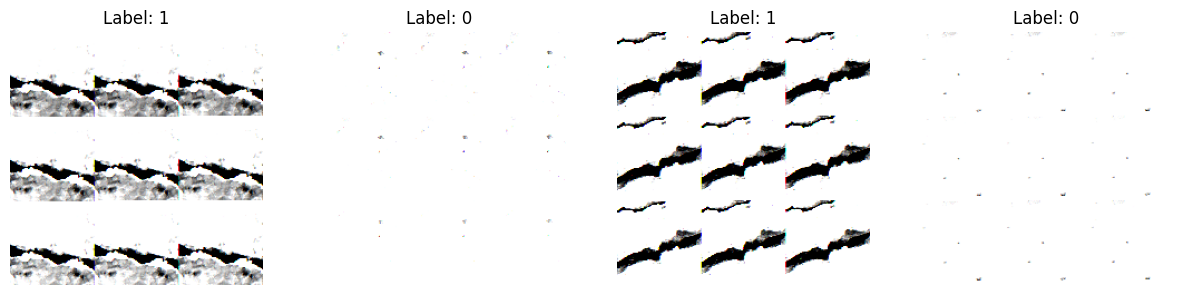

In [ ]:
n_images = 4

fig, axes = plt.subplots(1, n_images, figsize=(15, 5))

for i in range(n_images):
    img, label = dataset_val[i]
    axes[i].imshow(img.reshape(227, 227, 3))
    axes[i].set_title(f'Label: {label.item()}')
    axes[i].axis('off')

In [ ]:
samples = [dataset_val[15], dataset_val[102]]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, (img, label) in enumerate(samples):
    axes[i].imshow(img)
    axes[i].set_title(f'Label: {label.item()}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# **Criação do modelo**

In [ ]:
class CustomModel(torch.nn.Module):

    # Constructor
    def __init__(self, input_size, output_size):
        super(CustomModel, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)

    # Prediction
    def forward(self, x):
        z = self.linear(x)
        return z

In [ ]:
lr = 0.01
momentum = 0.2
batch_size = 64
criterion = torch.nn.CrossEntropyLoss()
epochs = 5
torch.manual_seed(0)

In [ ]:
out = 2
model = torch.nn.Linear(in_features=size_of_image, out_features=out)

optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_loader = DataLoader(dataset=dataset_train, batch_size=batch_size)
val_loader = DataLoader(dataset=dataset_val, batch_size=batch_size)

In [ ]:
loss_list = []
accuracy_list = []
N_test = len(val_loader)

In [ ]:
def train_model(epochs, train_loader, val_loader, model, criterion, optimizer, size_of_image, N_test):
    for epoch in range(epochs):
        model.train()  # Coloca o modelo em modo de treinamento

        for x, y in train_loader:
            optimizer.zero_grad()  # Zera os gradientes acumulados
            z = model(x.view(-1, size_of_image))  # Passa os dados pelo modelo
            loss = criterion(z, y)  # Calcula a perda
            loss.backward()  # Calcula os gradientes
            optimizer.step()  # Atualiza os pesos do modelo

        correct = 0
        model.eval()  # Coloca o modelo em modo de avaliação

        # Realiza a predição nos dados de validação
        with torch.no_grad():  # Desativa a computação dos gradientes
            for x_test, y_test in val_loader:
                z = model(x_test.view(-1, size_of_image))
                _, yhat = torch.max(z.data, 1)
                correct += (yhat == y_test).sum().item()

        # Calcula a acurácia
        accuracy = correct / N_test

        # Armazena a perda e a acurácia
        loss_list.append(loss.item())
        accuracy_list.append(accuracy)

        # Imprime a perda e a acurácia para cada época
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")

# **Treinamento e visualização do Loss e Accuracy**

In [ ]:
train_model(epochs, train_loader, val_loader, model, criterion, optimizer, size_of_image, N_test)

Epoch 1/5, Loss: 29.9422, Accuracy: 51.1592
Epoch 2/5, Loss: 147.7694, Accuracy: 52.3121
Epoch 3/5, Loss: 168.4907, Accuracy: 52.2038
Epoch 4/5, Loss: 123.4466, Accuracy: 53.4140
Epoch 5/5, Loss: 23.4091, Accuracy: 52.8726


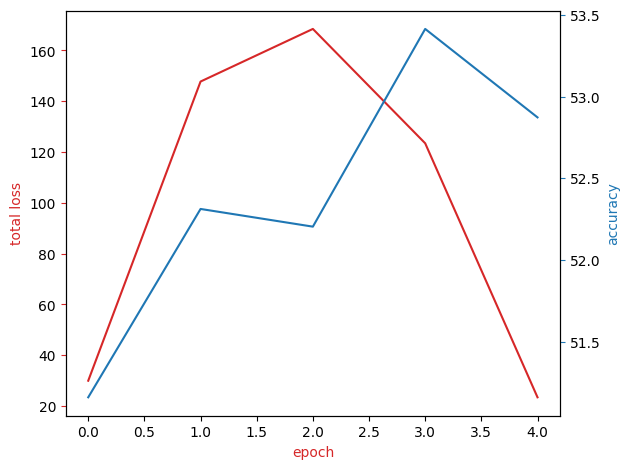

In [ ]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()